In [ ]:
%matplotlib inline


# Filling the area between lines


This example shows how to use ``fill_between`` to color between lines based on
user-defined logic.



In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.0, 2, 0.01)
y1 = np.sin(2 * np.pi * x)
y2 = 1.2 * np.sin(4 * np.pi * x)

Text(0.5, 0, 'x')

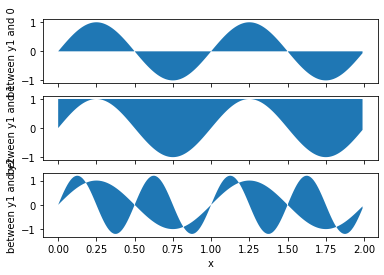

In [2]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

ax1.fill_between(x, 0, y1)
ax1.set_ylabel('between y1 and 0')

ax2.fill_between(x, y1, 1)
ax2.set_ylabel('between y1 and 1')

ax3.fill_between(x, y1, y2)
ax3.set_ylabel('between y1 and y2')
ax3.set_xlabel('x')

Now fill between y1 and y2 where a logical condition is met.  Note
this is different than calling
``fill_between(x[where], y1[where], y2[where] ...)``
because of edge effects over multiple contiguous regions.



Text(0.5, 1.0, 'Now regions with y2>1 are masked')

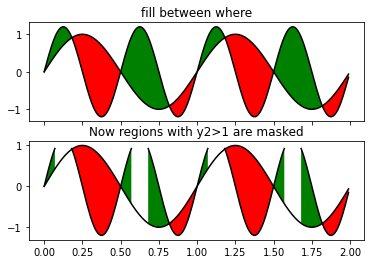

In [3]:
fig, (ax, ax1) = plt.subplots(2, 1, sharex=True)
ax.plot(x, y1, x, y2, color='black')
ax.fill_between(x, y1, y2, where=y2 >= y1, facecolor='green', interpolate=True)
ax.fill_between(x, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True)
ax.set_title('fill between where')

# Test support for masked arrays.
y2 = np.ma.masked_greater(y2, 1.0)
ax1.plot(x, y1, x, y2, color='black')
ax1.fill_between(x, y1, y2, where=y2 >= y1,
                 facecolor='green', interpolate=True)
ax1.fill_between(x, y1, y2, where=y2 <= y1,
                 facecolor='red', interpolate=True)
ax1.set_title('Now regions with y2>1 are masked')

This example illustrates a problem; because of the data
gridding, there are undesired unfilled triangles at the crossover
points.  A brute-force solution would be to interpolate all
arrays to a very fine grid before plotting.



Use transforms to create axes spans where a certain condition is satisfied:



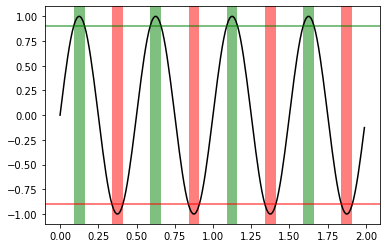

In [4]:
fig, ax = plt.subplots()
y = np.sin(4 * np.pi * x)
ax.plot(x, y, color='black')

# use data coordinates for the x-axis and the axes coordinates for the y-axis
import matplotlib.transforms as mtransforms
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
theta = 0.9
ax.axhline(theta, color='green', lw=2, alpha=0.5)
ax.axhline(-theta, color='red', lw=2, alpha=0.5)
ax.fill_between(x, 0, 1, where=y > theta,
                facecolor='green', alpha=0.5, transform=trans)
ax.fill_between(x, 0, 1, where=y < -theta,
                facecolor='red', alpha=0.5, transform=trans)


plt.show()